#Contexto

No presente trabalho, precisamos construir um algoritmo de aprendizado de máquina baseado em técnica de regressão linear. O dataset contém informações sobre características pessoais e custos de clientes de um determinado plano de saúde. O objetivo do algoritmo de aprendizado de máquina é prever o custo do plano de saúde a partir de informações fornecidas pelo cliente. Com essas informações é possível estimar o valor do plano de saúde para cada cliente.

# Dataset

O conjunto de dados pode ser baixado através do link: https://www.kaggle.com/datasets/mirichoi0218/insurance

O dataset contém as seguintes informações:

**age**: idade do beneficiário principal;

**sex**: sexo do contratante de seguros;

**bmi**: índice de massa corporal;

**children**: número de filhos/ pessoas dependentes;

**smoker**: fumante ou não-fumante;

**region:** área em que o beneficiário principal mora;

**charges:** custos médicos.

In [ ]:
#bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#abrindo os dados
base_dados = pd.read_csv('insurance.csv')
base_dados.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
base_dados.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
base_dados.describe(include = ['int64','float64'])

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Através da análise dos resumos estatísticos, não foi possível identificar possíveis valores de outliers. Todas as informações estão coerentes com o contexto.

Como podemos observar, não há elementos nulos no nosso dataset. Além disso, temos três colunas com dados categóricos, tais dados devem ser convertidos para valores numéricos. Ou seja, as variáveis categóricas devem ser convertidas em variáveis numéricas.

In [ ]:
base_dados['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
base_dados['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
base_dados['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
sex_features = pd.get_dummies(base_dados['sex'])
base_dados = pd.concat([base_dados, sex_features], axis = 1)

In [ ]:
smoker_features = pd.get_dummies(base_dados['smoker'])
base_dados = pd.concat([base_dados, smoker_features], axis = 1)

In [ ]:
region_features = pd.get_dummies(base_dados['region'])
base_dados = pd.concat([base_dados, region_features], axis = 1)

In [ ]:
base_dados.head(10)

,age,sex,bmi,children,smoker,region,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0
5,31,female,25.740,0,no,southeast,3756.62160,1,0,1,0,0,0,1,0
6,46,female,33.440,1,no,southeast,8240.58960,1,0,1,0,0,0,1,0
7,37,female,27.740,3,no,northwest,7281.50560,1,0,1,0,0,1,0,0
8,37,male,29.830,2,no,northeast,6406.41070,0,1,1,0,1,0,0,0
9,60,female,25.840,0,no,northwest,28923.13692,1,0,1,0,0,1,0,0


In [ ]:
base_dados.rename(columns = {'no':'smoker_no','yes':'smoker_yes'}, inplace = True)

In [ ]:
base_dados.head(10)

,age,sex,bmi,children,smoker,region,charges,female,male,smoker_no,smoker_yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0
5,31,female,25.740,0,no,southeast,3756.62160,1,0,1,0,0,0,1,0
6,46,female,33.440,1,no,southeast,8240.58960,1,0,1,0,0,0,1,0
7,37,female,27.740,3,no,northwest,7281.50560,1,0,1,0,0,1,0,0
8,37,male,29.830,2,no,northeast,6406.41070,0,1,1,0,1,0,0,0
9,60,female,25.840,0,no,northwest,28923.13692,1,0,1,0,0,1,0,0


Agora temos uma base de dados com valores categóricos convertidos em valores numéricos. Note que os dados categóricos foram convertidos em binários utilizando a função get_dummies do pandas, as diferentes categprias são representadas em diferentes colunas e com valores que indicam se os dados pertencem ou não a cada categoria. Tal método de tratamento é aplicado para eveitar que o algoritmo de aprendizado de máquina atribua mais significância para uma determinada categoria do quê para outra, gerando erros de predição.

**Tratamento dos dados**

Agora vamos verificar o comportamento das variáveis quantitativas e observar a distribuição de frequências através de histogramas e presença ou não de outliers.

**Variável 'charge'**

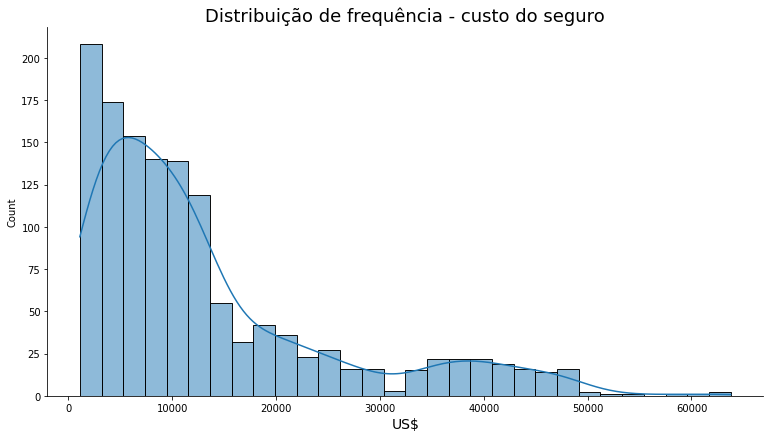

In [ ]:
#Construindo um histograma para variável charges, temos:
ax = sns.displot(data = base_dados['charges'],kind = 'hist',kde = True)
ax.figure.set_size_inches(12,6)
plt.title('Distribuição de frequência - custo do seguro', fontsize = 18)
plt.xlabel('US$', fontsize = 14)
ax

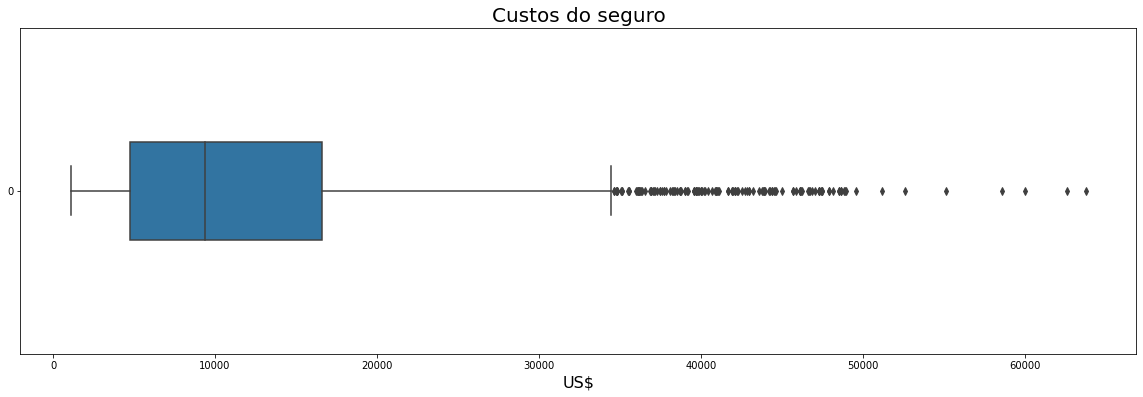

In [ ]:
#Construindo o boxplot da variável 'charges', temos:
ax = sns.boxplot(data = base_dados['charges'], orient = 'h',width = 0.3)
ax.figure.set_size_inches(20, 6)
ax.set_title('Custos do seguro', fontsize=20)
ax.set_xlabel('US$', fontsize=16)
ax

Como podemos ver, a distribuição de frequência de valores de custo do seguro é assimétrica à direita e possui valores outliers. Quando trabalhamos com regressão linear é necessário que os dados sejam aproximadamente normalmente distribuídos. Podemos verificar tratamentos de dados para fazer com que os dados se aproxime de uma distribuição normal.

In [ ]:
#Determinando valores outliers da variável 'charges':
Q1 = base_dados['charges'].quantile(q = 0.25)
Q3 = base_dados['charges'].quantile(q = 0.75)
IIQ = Q3 - Q1
lim_inf = Q1 - 1.5*IIQ
lim_sup = Q3 + 1.5*IIQ
print('Limite inferior: {}'.format(lim_inf))
print('Limite superior: {}'.format(lim_sup))

Limite inferior: -13109.1508975
Limite superior: 34489.350562499996


Portanto, os valores acima de 34489 são valores discrepantes, isto é, muito distantes da média.

**Variável 'age'**

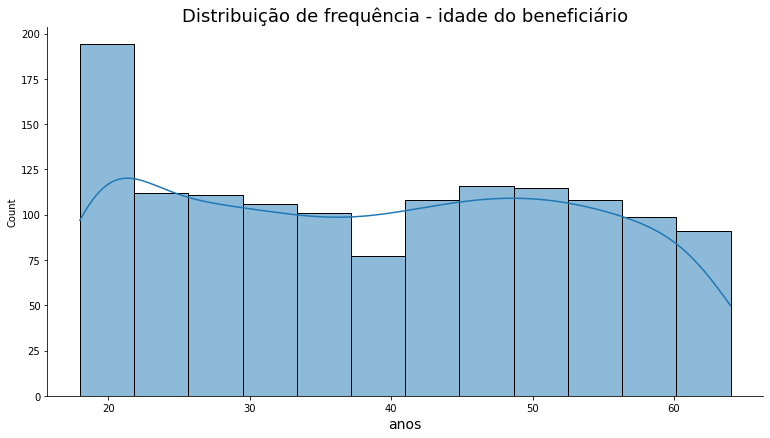

In [ ]:
#Construindo um histograma para variável 'age', temos:
ax = sns.displot(data = base_dados['age'],kind = 'hist',kde = True)
ax.figure.set_size_inches(12,6)
plt.title('Distribuição de frequência - idade do beneficiário', fontsize = 18)
plt.xlabel('anos', fontsize = 14)
ax

**Variável 'BMI'**

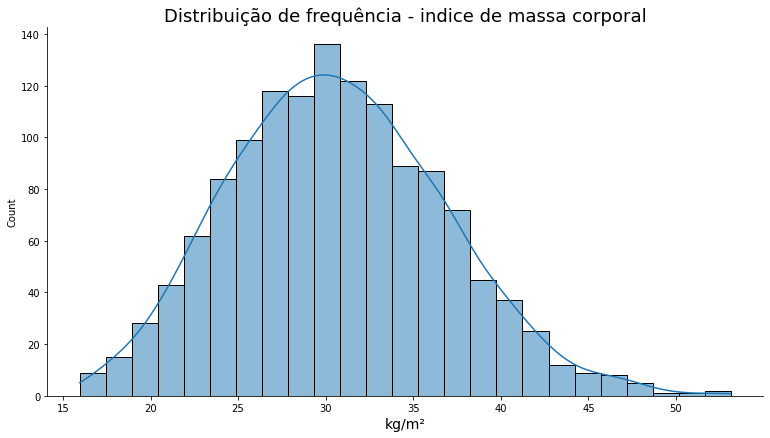

In [ ]:
#Construindo um histograma para variável 'bmi', temos:
ax = sns.displot(data = base_dados['bmi'],kind = 'hist',kde = True)
ax.figure.set_size_inches(12,6)
plt.title('Distribuição de frequência - indice de massa corporal', fontsize = 18)
plt.xlabel('kg/m²', fontsize = 14)
ax

**Variável 'children'**

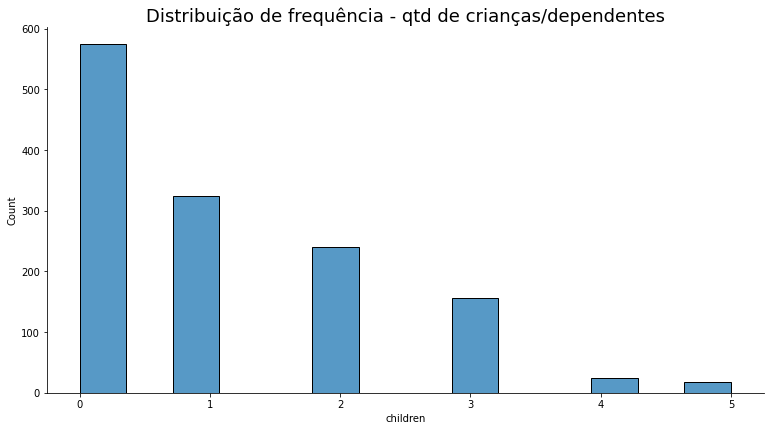

In [ ]:
#Construindo um histograma para variável 'children', temos:
ax = sns.displot(data = base_dados['children'],kind = 'hist')
ax.figure.set_size_inches(12,6)
plt.title('Distribuição de frequência - qtd de crianças/dependentes', fontsize = 18)
#plt.xlabel('US$', fontsize = 14)
ax

Construindo a matriz de correlação para verificar a relação entre as variáveis, temos:

In [ ]:
base_dados.corr()

,age,bmi,children,charges,female,male,smoker_no,smoker_yes,northeast,northwest,southeast,southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


A variável dependente 'charges' tem alta correlação com a variável 'smoker_no' e 'smoker_yes, apresentando correlação de 0,7872. Também possui boa correlação com as variáveis 'age' e 'bmi'.

Podemos dropar as colunas 'female', 'smoker_no', pois como os dados são binários, não haverá prejuízo no dataset. Apenas estamos retirando uma das colunas binárias, a informação ainda está contida na segunda coluna binária. Na prática estamos apenas reduzindo o tamanho do conjunto de dados, sem prejuízo para a contrução do algoritmo de aprendizado de máquina.

In [ ]:
base_dados.drop(labels = ['smoker_no','female'], axis = 1, inplace = True)

In [ ]:
base_dados.head(10)

,age,sex,bmi,children,smoker,region,charges,male,smoker_yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1,0,0
5,31,female,25.740,0,no,southeast,3756.62160,0,0,0,0,1,0
6,46,female,33.440,1,no,southeast,8240.58960,0,0,0,0,1,0
7,37,female,27.740,3,no,northwest,7281.50560,0,0,0,1,0,0
8,37,male,29.830,2,no,northeast,6406.41070,1,0,1,0,0,0
9,60,female,25.840,0,no,northwest,28923.13692,0,0,0,1,0,0


Como sabemos, pessoas que fumam costumam apresentar mais problemas de saúde do quê as pessoas não fumantes, o que indica que essa população irá necessitar de mais cuidados e, consequentemente, maiores serão os custos para o plano de saúde contratado. Logo, devemos verificar se há diferença nos custos entre as populações de fumantes e não fumantes.

Para verificar a diferença entre duas populações, podemos construir um boxplot e comparar

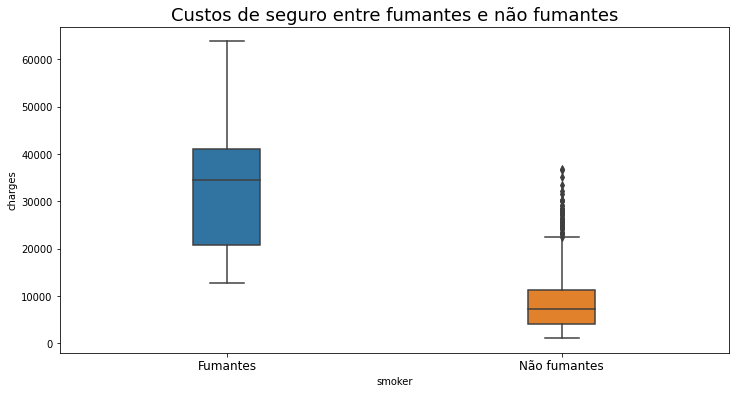

In [ ]:
ax = sns.boxplot(x = 'smoker',y = 'charges', data = base_dados, width = 0.2)
ax.figure.set_size_inches(12,6) #tamanho da figura
ax.set_title('Custos de seguro entre fumantes e não fumantes',fontsize = 18) #configurando o título do gráfico

ax.set_xticklabels(labels = ['Fumantes','Não fumantes'], fontsize = 12) #configurando os labels do eixo x

ax

Os boxplots sugerem que temos duas populações distintas, fumantes e não fumantes. Como vimos, os fumantes apresentam custos mais elevados ao seguro que os clientes não fumantes. Portanto, devemos eleborar um algoritmo de aprendizado de máquina para cada uma das duas populações, um algoritmo de predição para os fumantes e um para os não fumantes, de modo a obtermos um desempenho melhor. No final, vamos comparar o desempenho de cada uma das máquinas e comparar com o resultado da máquina utilizando todos os dados em conjunto.


Outra pergunta importante que deve ser respondida é: "há diferenças entre os sexos em relação aos custos do plano de saúde?" Para responder essa pergunta, vamos comparar as duas populações, homens e mulheres, através de diagramas de caixa.

Comparando os custos de homens e mulheres, temos:

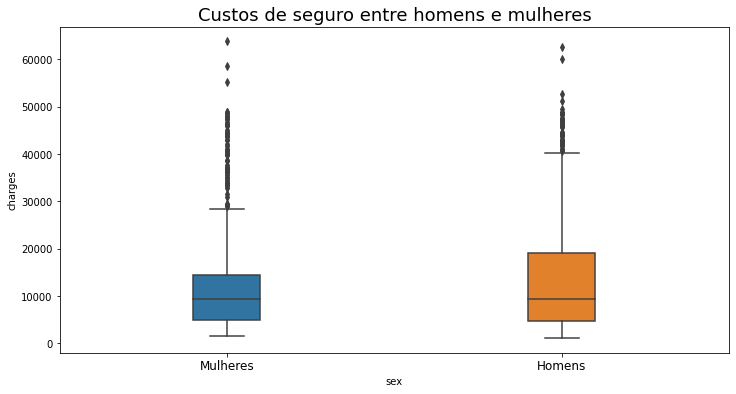

In [ ]:
ax = sns.boxplot(x = 'sex',y = 'charges', data = base_dados, width = 0.2)
ax.figure.set_size_inches(12,6) #tamanho da figura
ax.set_title('Custos de seguro entre homens e mulheres',fontsize = 18) #configurando o título do gráfico

ax.set_xticklabels(labels = ['Mulheres','Homens'], fontsize = 12) #configurando os labels do eixo x

ax

In [ ]:
#estatísticas descritivas da variável 'custos' para cada gênero.
agrupamento = base_dados.groupby(by = 'sex')
agrupamento['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,12569.578844,11128.703801,1607.5101,4885.1587,9412.96250,14454.691825,63770.42801
male,676.0,13956.751178,12971.025915,1121.8739,4619.1340,9369.61575,18989.590250,62592.87309


O gênero masculino está associado a custos relativamente maiores. Como sabemos, a população de fumantes apresenta custos significativamente maiores que os não fumantes. Será que os custos maiores do sexo masculino está associado ao fato de ser esse o gênero que tem mais fumantes?

In [ ]:
base_dados.head(10)

,age,sex,bmi,children,smoker,region,charges,male,smoker_yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1,0,0
5,31,female,25.740,0,no,southeast,3756.62160,0,0,0,0,1,0
6,46,female,33.440,1,no,southeast,8240.58960,0,0,0,0,1,0
7,37,female,27.740,3,no,northwest,7281.50560,0,0,0,1,0,0
8,37,male,29.830,2,no,northeast,6406.41070,1,0,1,0,0,0
9,60,female,25.840,0,no,northwest,28923.13692,0,0,0,1,0,0


In [ ]:
selecao = base_dados[base_dados['smoker'] == 'yes']
selecao['sex'].value_counts()

male      159
female    115
Name: sex, dtype: int64

Logo, temos mais homens fumantes do que mulheres. O fato dos homens fumarem mais que as mulheres está associado aos custos mais altos do gênero masculino.

Criando base fumantes e base não fumantes

In [ ]:
#construindo dataframe com não fumantes
dados_n_smoker = base_dados[base_dados['smoker'] == 'no']
dados_n_smoker.drop(labels = ['smoker_yes','smoker'], axis = 1, inplace = True)
dados_n_smoker

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,age,sex,bmi,children,region,charges,male,northeast,northwest,southeast,southwest
1,18,male,33.770,1,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,northwest,3866.85520,1,0,1,0,0
5,31,female,25.740,0,southeast,3756.62160,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1332,52,female,44.700,3,southwest,11411.68500,0,0,0,0,1
1333,50,male,30.970,3,northwest,10600.54830,1,0,1,0,0
1334,18,female,31.920,0,northeast,2205.98080,0,1,0,0,0
1335,18,female,36.850,0,southeast,1629.83350,0,0,0,1,0


In [ ]:
#construindo dataframe com fumantes
dados_y_smoker = base_dados[base_dados['smoker'] == 'yes']
dados_y_smoker.drop(labels = ['smoker_yes','smoker'], axis = 1, inplace = True)
dados_y_smoker

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,age,sex,bmi,children,region,charges,male,northeast,northwest,southeast,southwest
0,19,female,27.900,0,southwest,16884.92400,0,0,0,0,1
11,62,female,26.290,0,southeast,27808.72510,0,0,0,1,0
14,27,male,42.130,0,southeast,39611.75770,1,0,0,1,0
19,30,male,35.300,0,southwest,36837.46700,1,0,0,0,1
23,34,female,31.920,1,northeast,37701.87680,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1313,19,female,34.700,2,southwest,36397.57600,0,0,0,0,1
1314,30,female,23.655,3,northwest,18765.87545,0,0,1,0,0
1321,62,male,26.695,0,northeast,28101.33305,1,1,0,0,0
1323,42,female,40.370,2,southeast,43896.37630,0,0,0,1,0


#base dados fumantes

verificando as estatísticas descritivas da base de dados de fumantes e as distribuições de frequência para cada variável quantitativa.

In [ ]:
dados_y_smoker.describe(include = ['float64', 'int64'])

,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


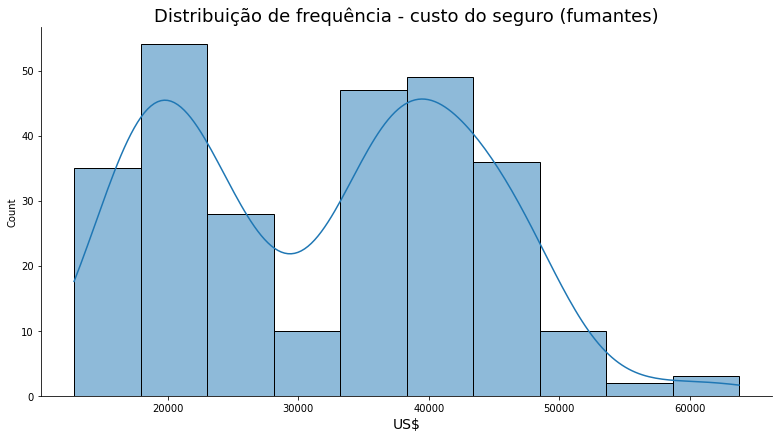

In [ ]:
#Construindo um histograma para variável 'charges', temos:
ax = sns.displot(data = dados_y_smoker['charges'],kind = 'hist',kde = True)
ax.figure.set_size_inches(12,6)
plt.title('Distribuição de frequência - custo do seguro (fumantes)', fontsize = 18)
plt.xlabel('US$', fontsize = 14)
ax

A variável dependente 'charges' não possui distribuição simétrica, sendo sua distribuição binodal. Podemos aplicar transformações de variável para aproximar o comportamento da distribuição da variável à uma distribuição normal.

matriz de correlação 

In [ ]:
dados_y_smoker.corr()

,age,bmi,children,charges,male,northeast,northwest,southeast,southwest
age,1.000000,0.059674,0.081183,0.368224,-0.005758,-0.011290,0.030313,0.061987,-0.089901
bmi,0.059674,1.000000,-0.012619,0.806481,0.148350,-0.193326,-0.128827,0.267021,0.024379
children,0.081183,-0.012619,1.000000,0.035945,0.076907,-0.033675,0.073008,-0.069078,0.042066
charges,0.368224,0.806481,0.035945,1.000000,0.101226,-0.117370,-0.083583,0.171069,0.009843
male,-0.005758,0.148350,0.076907,0.101226,1.000000,-0.015134,-0.084307,0.034441,0.060521
northeast,-0.011290,-0.193326,-0.033675,-0.117370,-0.015134,1.000000,-0.294808,-0.401187,-0.294808
northwest,0.030313,-0.128827,0.073008,-0.083583,-0.084307,-0.294808,1.000000,-0.365412,-0.268519
southeast,0.061987,0.267021,-0.069078,0.171069,0.034441,-0.401187,-0.365412,1.000000,-0.365412
southwest,-0.089901,0.024379,0.042066,0.009843,0.060521,-0.294808,-0.268519,-0.365412,1.000000


A variável dependente 'charges' apresenta alta correlação com as variáveis 'age' e 'bmi', candidatas a variáveis explicativas do algoritmo de regressão linear. Além disso, as variáveis explicativas não possuem correlação alta entre si.

Note que as variáveis 'charges' e 'bmi' apresentam alta correlação entre si. Tal resultado mostra que quanto maior o índice de massa corporal do fumante, maior será os custos associados. Pois além de ter um paciente fumante, tem-se um paciente acima do peso e com problemas associados ao sobrepeso. Além disso, com o aumento da idade, maior será o custo.

  Construindo gráfico de dispersão entre as variáveis, temos:

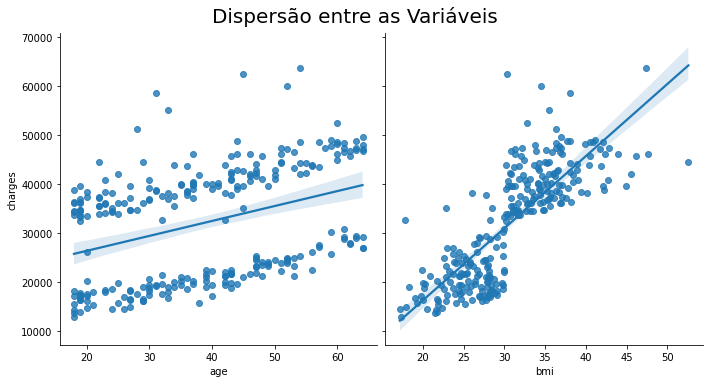

In [ ]:
ax = sns.pairplot(dados_y_smoker, y_vars = 'charges', x_vars = ['age','bmi'], height = 5, kind = 'reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

Aplicando transformação logarítmica nos dados, temos:

Primeiramente, devemos verificar se os dados passuem valores nulos.

In [ ]:
dados_y_smoker.head()

,age,sex,bmi,children,region,charges,male,northeast,northwest,southeast,southwest
0,19,female,27.90,0,southwest,16884.9240,0,0,0,0,1
11,62,female,26.29,0,southeast,27808.7251,0,0,0,1,0
14,27,male,42.13,0,southeast,39611.7577,1,0,0,1,0
19,30,male,35.30,0,southwest,36837.4670,1,0,0,0,1
23,34,female,31.92,1,northeast,37701.8768,0,1,0,0,0


In [ ]:
dados_y_smoker.describe()

,age,bmi,children,charges,male,northeast,northwest,southeast,southwest
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832,0.580292,0.244526,0.211679,0.332117,0.211679
std,13.923186,6.318644,1.157066,11541.547176,0.494414,0.430592,0.409246,0.471834,0.409246
min,18.000000,17.195000,0.000000,12829.455100,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.083750,0.000000,20826.244213,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,30.447500,1.000000,34456.348450,1.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,35.200000,2.000000,41019.207275,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,52.580000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


As variáveis 'age' e 'bmi' não possuem valores nulos. Logo, temos:

In [ ]:
dados_y_smoker['log_age'] = np.log(dados_y_smoker['age'])
dados_y_smoker['log_bmi'] = np.log(dados_y_smoker['bmi'])
dados_y_smoker['log_charges'] = np.log(dados_y_smoker['charges'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

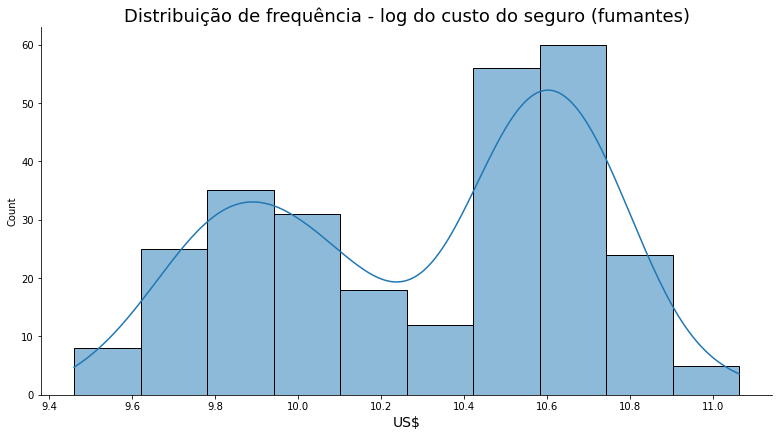

In [ ]:
#Construindo um histograma para variável 'charges', temos:
ax = sns.displot(data = dados_y_smoker['log_charges'],kind = 'hist',kde = True)
ax.figure.set_size_inches(12,6)
plt.title('Distribuição de frequência - log do custo do seguro (fumantes)', fontsize = 18)
plt.xlabel('US$', fontsize = 14)
ax

In [ ]:
dados_y_smoker.corr()

,age,bmi,children,charges,male,northeast,northwest,southeast,southwest,log_age,log_bmi,log_charges
age,1.000000,0.059674,0.081183,0.368224,-0.005758,-0.011290,0.030313,0.061987,-0.089901,0.985260,0.068698,0.372112
bmi,0.059674,1.000000,-0.012619,0.806481,0.148350,-0.193326,-0.128827,0.267021,0.024379,0.049653,0.990742,0.806105
children,0.081183,-0.012619,1.000000,0.035945,0.076907,-0.033675,0.073008,-0.069078,0.042066,0.125488,-0.027264,0.040281
charges,0.368224,0.806481,0.035945,1.000000,0.101226,-0.117370,-0.083583,0.171069,0.009843,0.353561,0.807854,0.986995
male,-0.005758,0.148350,0.076907,0.101226,1.000000,-0.015134,-0.084307,0.034441,0.060521,-0.000598,0.163077,0.110369
northeast,-0.011290,-0.193326,-0.033675,-0.117370,-0.015134,1.000000,-0.294808,-0.401187,-0.294808,-0.003876,-0.204116,-0.126983
northwest,0.030313,-0.128827,0.073008,-0.083583,-0.084307,-0.294808,1.000000,-0.365412,-0.268519,0.021281,-0.109331,-0.078337
southeast,0.061987,0.267021,-0.069078,0.171069,0.034441,-0.401187,-0.365412,1.000000,-0.365412,0.059940,0.248205,0.172628
southwest,-0.089901,0.024379,0.042066,0.009843,0.060521,-0.294808,-0.268519,-0.365412,1.000000,-0.086310,0.037929,0.012914
log_age,0.985260,0.049653,0.125488,0.353561,-0.000598,-0.003876,0.021281,0.059940,-0.086310,1.000000,0.057218,0.359773


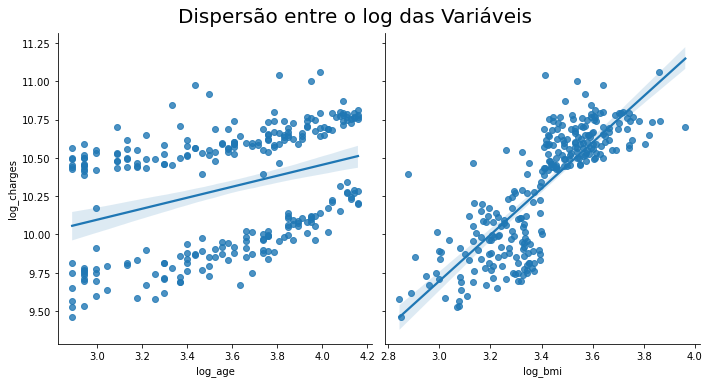

In [ ]:
ax = sns.pairplot(dados_y_smoker, y_vars = 'log_charges', x_vars = ['log_age','log_bmi'], height = 5, kind = 'reg')
ax.fig.suptitle('Dispersão entre o log das Variáveis', fontsize=20, y=1.05)
ax

#Estimação de modelos de regressão linear com o statsmodels

Criando algoritmo de aprendizado de máquina baseado em regressão linear, temos:

In [ ]:
y = dados_y_smoker['log_charges']
X = dados_y_smoker[['log_age','log_bmi']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 2)

Estimando modelo com statsmodels

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X_train_com_constante = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X_train_com_constante

,const,log_age,log_bmi
953,1.0,3.784190,3.407842
1240,1.0,3.951244,3.732896
966,1.0,3.931826,3.210642
419,1.0,4.143135,3.295096
185,1.0,3.583519,3.735166
...,...,...,...
322,1.0,3.526361,3.427515
86,1.0,4.043051,3.439135
301,1.0,3.970292,3.118392
58,1.0,3.970292,3.130263


In [ ]:
#Estimando o modelo de regressão linear, temos:
modelo_statsmodels_1 = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

In [ ]:
print(modelo_statsmodels_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     276.5
Date:                Sat, 14 May 2022   Prob (F-statistic):           1.02e-56
Time:                        03:01:43   Log-Likelihood:                 45.796
No. Observations:                 191   AIC:                            -85.59
Df Residuals:                     188   BIC:                            -75.83
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2632      0.260     16.409      0.0

Resultados obtidos:

R-squared = 0,746
Prob (F-statistic) = 0 

Os resultados acima msotram que 74,6% dos resultados de custos é explicado pelas variáveis explicativas, o resto é devido a aleatoriedades. Prob (F-statistic) < 0,05 indica que o conjunto de variáveis explicativas utilizadas na estimação do modelo apresenta significância e podem ser utilizadas nas estimação da variável dependente. ALém disso, avaliando cada variável explicativa, podemos concluir que todas as variáveis apresentam significância, uma vez que P>|t| = 0 para todas.

Estimando um algoritmo empregando os dados sem transformação, temos:

In [ ]:
y = dados_y_smoker['charges']
X = dados_y_smoker[['age','bmi']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 2)

In [ ]:
X_train_com_constante = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Estimando o modelo de regressão linear, temos:
modelo_statsmodels_1 = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()
print(modelo_statsmodels_1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     263.5
Date:                Sat, 14 May 2022   Prob (F-statistic):           2.96e-55
Time:                        03:04:54   Log-Likelihood:                -1925.9
No. Observations:                 191   AIC:                             3858.
Df Residuals:                     188   BIC:                             3867.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.135e+04   2384.138     -8.955      0.0

Tal resultadom indica que podemos utilizar tanto o algoritmo treinado com os dados transformados quanto o algoritmo treinado com os dados sem transformação.

#Estimando modelos com o LinearRegression()

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

In [ ]:
X = dados_y_smoker[['age','bmi']]
y = dados_y_smoker['charges']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 2)

In [ ]:
modelo1 = LinearRegression()
modelo1.fit(X_train, y_train)
#verificando o ajuste dos dados à reta de regressão, temos:
print('R²: {}'.format(modelo1.score(X_train, y_train).round(3)))

R²: 0.737


Note que o R² coincide com o obtido utilizando-se o statsmodels.

No código acima, criamos uma reta de regressão usando os dado de treinamento e, em seguida, verificamos o ajuste dos pares de dados (X_train, y_train) à reta de regressão criada, obtendo um R² de 0,737.

Gerando previsões com os dados de teste, temos:

In [ ]:
y_previsto = modelo1.predict(X_test)

Em seguida, podemos comparar os dados de y previstos usando a reta de regressão linear e os dados reais.

In [ ]:
#verificando se os dados previstos estão próximos do valor real da variável Valor.
print('R²: {}'.format(metrics.r2_score(y_test,y_previsto).round(2)))

R²: 0.78


Analisando graficamente os resultados, temos:

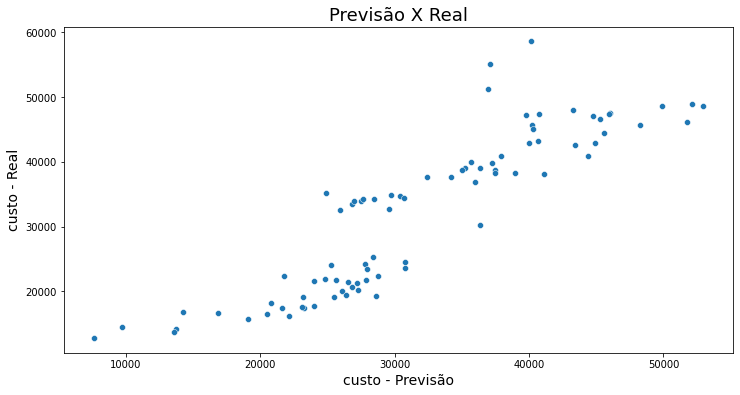

In [ ]:
ax = sns.scatterplot(x = y_previsto, y = y_test)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('custo - Previsão', fontsize=14)
ax.set_ylabel('custo - Real', fontsize=14)
ax

Obtendo os resíduos, temos:

In [ ]:
residuo = y_test - y_previsto

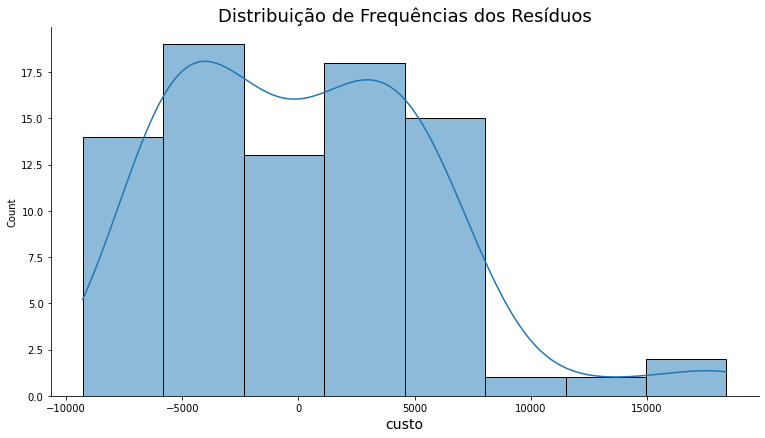

In [ ]:
ax = sns.displot(data = residuo,kind = 'hist',kde = True)
ax.figure.set_size_inches(12, 6)
plt.title('Distribuição de Frequências dos Resíduos', fontsize=18)
plt.xlabel('custo', fontsize=14)
ax